# در این برنامه ما از روی داده های که داریم میخوایم کلاس بندی رو انجام بدیم که به دو کلاس تقسیم میکنیم 

### کتاب خانه های مورد استفاده رو ابتدا ایمپورت میکنیم

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score, jaccard_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### دیتا ست مورد نظر رو ابتدا وارد میکنیم 

In [8]:
data = pd.read_csv('16325569497737558.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### کلاس های که داریم رو میتونیم از روی کلاس هدف مشاهده کنیم در اینجا ما دو کلاس داریم

In [9]:
data['output'].value_counts()

output
1    165
0    138
Name: count, dtype: int64

### و برای اشنایی بیشتر و درک بهتر داده ها اون هارو رسم میکنیم 

array([[<Axes: title={'center': 'thalachh'}>]], dtype=object)

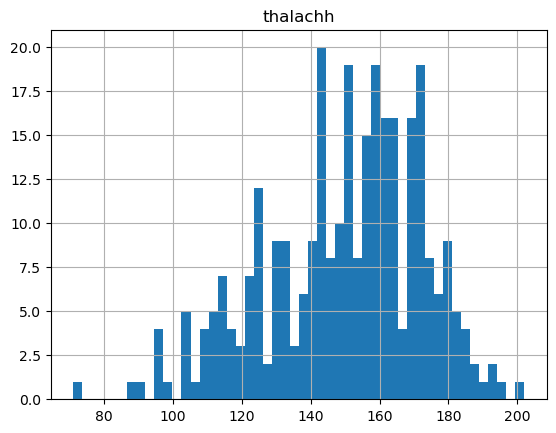

In [10]:
data.hist(column='thalachh', bins=50)

###  با این دستور میتونیم تمامی ستون های موجود درون دیتا ست مورد نظر رو مشاهده کنیم

In [11]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

### داده هامون رو به دو دسته جدا میکنیم 

In [12]:
X = data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall',]].values
y = data[['output']].values

### سپس داده هامون رو نرمال سازی میکنیم تا اختلاف بین داده های بزرگ و کوچیک رو کم کنیم 

In [13]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X.astype(float))

### حالا از روی داده های که داریم و نرمال سازی کردیم ماشین خودمون رو اموزش میدیم 

In [14]:
k = 5
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=5)
model = KNeighborsClassifier(n_neighbors=k).fit(train_x, train_y)
predicted = model.predict(test_x)
print (accuracy_score(test_y, predicted))

0.9032258064516129


/home/eugene/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


### و در این قسمت هم داده های که تست روشون انجام شده در برسی  میکنیم با مقدار واقعی 

In [15]:
for i in range(len(predicted)):
    print(f"Real : {test_y[i]} predicted : {predicted[i]} ")
    print("*******************************************************")

Real : [0] predicted : 1 
*******************************************************
Real : [0] predicted : 0 
*******************************************************
Real : [0] predicted : 0 
*******************************************************
Real : [0] predicted : 0 
*******************************************************
Real : [1] predicted : 1 
*******************************************************
Real : [0] predicted : 0 
*******************************************************
Real : [1] predicted : 1 
*******************************************************
Real : [0] predicted : 0 
*******************************************************
Real : [1] predicted : 1 
*******************************************************
Real : [1] predicted : 1 
*******************************************************
Real : [1] predicted : 1 
*******************************************************
Real : [0] predicted : 0 
*******************************************************
Real : [1] predi

### و در این قسمت هم از مدل خروجی گرفتیم که بتوان در اینده روی داده های دیگه ازش خروجی گرفت 

In [16]:
import joblib
joblib.dump(model, 'classification.pk1')

['classification.pk1']

In [24]:
nx = [[0, 63 ,1 ,3, 145, 233, 1, 0 ,150, 2.3, 0, 0, 1]]
scaler = preprocessing.StandardScaler().fit(nx)
nxs = scaler.transform(nx)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])